

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In this project, I decided to investigate TMDb movie dataset to address the following questions: 

1- What kinds of properties are associated with movies that have high revenues? 

2- Are movies' profits affected by the month of release ?

The workflow in brief will be : first I will load the data and analyse its characteristics. Furthermore, I will clean the data to be suitable for analysis and visualization. Then I will analyse the processed data and provides some results based on my observation. Mainly, in this project I will focus on numeric features more than text features. 

In [15]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # plot libraries for visualization 
import csv # read and write csv files
import pandas as pd # to handel and deal with large amount of data
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.
# Pretty display for notebooks
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [16]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

# Load  data 
dataset = pd.read_csv("tmdb-movies.csv")

# Display the first five records to explore the data in general
display(dataset.head(n=5))

# Display data's information to check the features types and the number of missing values in the data in general
dataset.info()


print('The statistical summary of the data')
np.round(dataset.describe(), 2).T[['count','mean', 'std', 'min', 'max']]



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,count,mean,std,min,max
id,10866.0,66064.18,9.213014e+04,5.0,4.178590e+05
popularity,10866.0,0.65,1.000000e+00,0.0,3.299000e+01
budget,10866.0,14625701.09,3.091321e+07,0.0,4.250000e+08
revenue,10866.0,39823319.79,1.170035e+08,0.0,2.781506e+09
runtime,10866.0,102.07,3.138000e+01,0.0,9.000000e+02
vote_count,10866.0,217.39,5.756200e+02,10.0,9.767000e+03
vote_average,10866.0,5.97,9.400000e-01,1.5,9.200000e+00
release_year,10866.0,2001.32,1.281000e+01,1960.0,2.015000e+03
budget_adj,10866.0,17551039.82,3.430616e+07,0.0,4.250000e+08
revenue_adj,10866.0,51364363.25,1.446325e+08,0.0,2.827124e+09



### Data Cleaning 

In this study, I'm not interested in the following features: homepage, tagline, keywords, overview, imdb_id, id, original_title, cast , director , genres, production_companies, budget_adj, revenue_adj so I will exclude them from the dataset. Then I will remove rows that have any missing values. 

In [17]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
un_needed_features = ['original_title', 'tagline', 'homepage', 'overview', 'keywords', 'imdb_id', 'id', 'cast' , 'director' , 'genres', 'production_companies', 'budget_adj', 'revenue_adj' ]
processed_dataset = dataset.drop(un_needed_features, axis = 1)

# Display the first 1000 records
display(processed_dataset.head(n=10))



,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,124,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,120,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,119,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,136,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,137,4/1/15,2947,7.3,2015
5,9.110700,135000000,532950503,156,12/25/15,3929,7.2,2015
6,8.654359,155000000,440603537,125,6/23/15,2598,5.8,2015
7,7.667400,108000000,595380321,141,9/30/15,4572,7.6,2015
8,7.404165,74000000,1156730962,91,6/17/15,2893,6.5,2015
9,6.326804,175000000,853708609,94,6/9/15,3935,8.0,2015


As we can see in the above section (General Properties), the selected features (popularity, budget, revenue, runtime, release_date, vote_count, vote_average amd release_yea) have no none-values but I noticed the budget and revenue features have a lot of zero values. So, I will delete rows thet contain 0 values.

In [18]:
# replace 0s values with none values to be removed in the next step 
processed_dataset = processed_dataset.replace(0, np.nan)

# drop rows with missing values
cleaned_dataset = processed_dataset.dropna(axis=0, how="any")

# Print the results
print('Total number of records before removing missing values', len(dataset["release_date"]))

# Print the results
print("Total number of records after removing missing values", len(cleaned_dataset["release_date"]))

# Display the first 1000 records after cleaning
display(cleaned_dataset.head(n=10))

Total number of records before removing missing values 10866
Total number of records after removing missing values 3855


,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,124.0,6/9/15,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,120.0,5/13/15,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,119.0,3/18/15,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,136.0,12/15/15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,137.0,4/1/15,2947,7.3,2015
5,9.110700,135000000.0,5.329505e+08,156.0,12/25/15,3929,7.2,2015
6,8.654359,155000000.0,4.406035e+08,125.0,6/23/15,2598,5.8,2015
7,7.667400,108000000.0,5.953803e+08,141.0,9/30/15,4572,7.6,2015
8,7.404165,74000000.0,1.156731e+09,91.0,6/17/15,2893,6.5,2015
9,6.326804,175000000.0,8.537086e+08,94.0,6/9/15,3935,8.0,2015


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : What kinds of properties are associated with movies that have high revenues? 

In this section, I will study the factors that leads to high revenues in general. In the second question, I will investigate if the movies' profits are affected by the month of release. 

### Movies distribution over years

First I will provide a general idea about the movies distribution over years. 

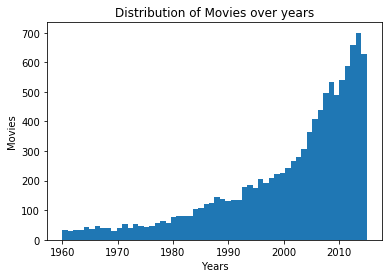

In [19]:
# generate a histogram that shows movies distribution over years
y_data = processed_dataset["release_year"]
bins = len(y_data.value_counts())
plt.hist(y_data, bins)
plt.title('Distribution of Movies over years')
plt.xlabel('Years')
plt.ylabel('Movies')
plt.show()

As we can see from the figure above, the movies releases are increasing over time. Particularly, we can see the most releases was in 2014. 

### Selecting and Analysing factors that are associated with movies revenues 

Now, I want to pick the most related features to movies' revenues. So, I used a heatmap function from seaborn library to provide an insight about features correlation. 

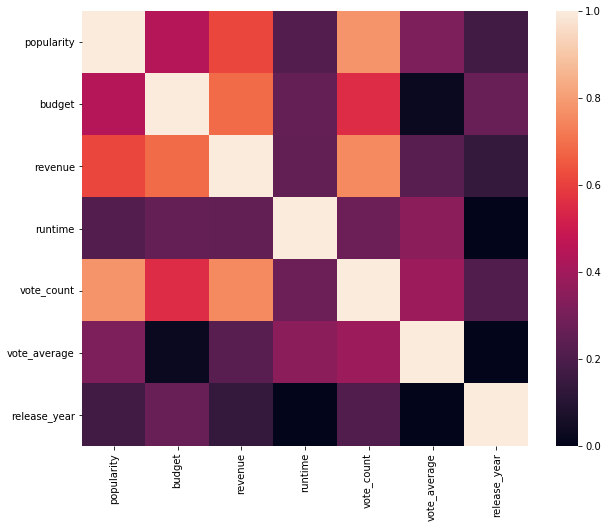

In [20]:
import seaborn as sns
corr = cleaned_dataset.corr()
fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, vmin=0, vmax=1,ax=ax )

Based on the results above, I decided to study the correlation between movies' revenues and budgets. Furthermore, the correlation between movies' revenues and users' votes. Since they are the most related factors to movies revenues. 

### Analysing the correlation between movies' budget and users' votes, and  movies' revenues 

Text(0.5,1,"Correlation between movies' revenues and budgets")

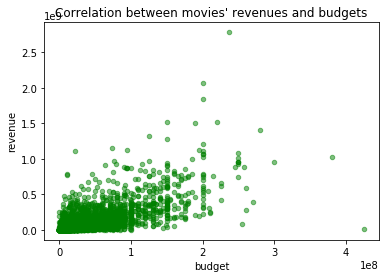

In [22]:
# Plot budget and revenue data to discover if there is any correlation 
cleaned_dataset.plot.scatter("budget", "revenue", alpha=0.5, color = 'Green')
plt.title('Correlation between movies\' revenues and budgets')


As we can see from the figure above, the revenues amount is slightly grown when the budget amount increased.

Text(0.5,1,"Correlation between movies' revenues and users' votes")

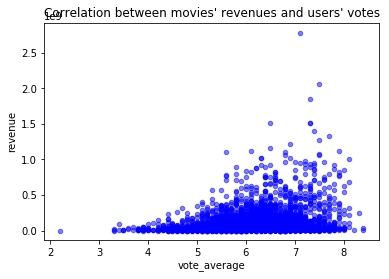

In [23]:
# Plot vote_average and revenue data to discover if there is any correlation 
cleaned_dataset.plot.scatter("vote_average", "revenue", alpha=0.5, color = 'blue')
plt.title('Correlation between movies\' revenues and users\' votes')

As we can see from the figure above, the revenues amount is increasing while users' votes is increasing.  

### Research Question 2  : Are movies' profits affected by the month of release ?

Since the release's time is given as a full date in string format, I will process this data, convert it to date format and extract the month information to study the relationship.

In [24]:
# I will utilize csv library to deal with the data as a dictionary  

def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """

    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        film_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_film = next(film_reader)
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_film)
    # output city name and first movie for later testing
    return (first_film)

# list of files for each city
data_file = 'tmdb-movies.csv'

# print the first trip from each file, store in dictionary

first_film = print_first_point(data_file)
    

OrderedDict([('id', '135397'),
             ('imdb_id', 'tt0369610'),
             ('popularity', '32.985763'),
             ('budget', '150000000'),
             ('revenue', '1513528810'),
             ('original_title', 'Jurassic World'),
             ('cast',
              'Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent '
              "D'Onofrio|Nick Robinson"),
             ('homepage', 'http://www.jurassicworld.com/'),
             ('director', 'Colin Trevorrow'),
             ('tagline', 'The park is open.'),
             ('keywords', 'monster|dna|tyrannosaurus rex|velociraptor|island'),
             ('overview',
              'Twenty-two years after the events of Jurassic Park, Isla Nublar '
              'now features a fully functioning dinosaur theme park, Jurassic '
              'World, as originally envisioned by John Hammond.'),
             ('runtime', '124'),
             ('genres', 'Action|Adventure|Science Fiction|Thriller'),
             ('production_companies'

In [25]:
# This method is used to convert the date format from straing to date
def date_of_release(datum):
    
    dateTimeFormat = datetime.strptime(datum,"%m/%d/%y")
    month = dateTimeFormat.month
    day_of_week = dateTimeFormat.strftime('%A')
        
    return (month, day_of_week)


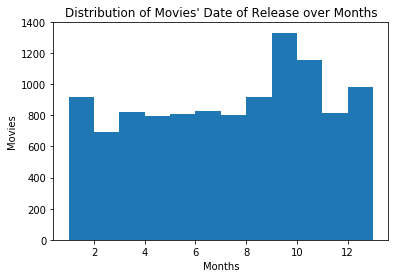

In [26]:
# This method is used to get all releases months data 
def get_month_data(filename):
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize data variable
        m_data = []
        
        for row in reader:
            month = date_of_release(row['release_date'])[0]
            m_data.append(round(float(month)))
                               
        return (m_data)
    

# Draw a histogarm for the releases months data to represent the distribution of data
m_data = get_month_data(data_file)
bins = np.arange(1,14,1)
plt.hist(m_data, bins)
plt.title('Distribution of Movies\' Date of Release over Months')
plt.xlabel('Months')
plt.ylabel('Movies')
plt.show()



As we can see from the graph above, September has the highest number of movies released, then October, then December, August and January. Feburary has the least number of movies released and I think because of the Oscar ceremony date which usually held in Feburary. So, releasing movies in this month will lower the chance of nominations. For the same reason I think the most released where in Sept. and Oct. which considered a suitable time so users can see the movies and remember to vote for them.

Jan's total number of movies' releases: 919, total number of profit: 6708157470.0 and average profit: 7299410
Feb's total number of movies' releases: 691, total number of profit: 10530152760.0 and average profit: 15239005
Mar's total number of movies' releases: 823, total number of profit: 19260199242.0 and average profit: 23402429
Apr's total number of movies' releases: 797, total number of profit: 15835769296.0 and average profit: 19869221
May's total number of movies' releases: 809, total number of profit: 34442666528.0 and average profit: 42574371
June's total number of movies' releases: 827, total number of profit: 43658063286.0 and average profit: 52790887
July's total number of movies' releases: 799, total number of profit: 30086045761.0 and average profit: 37654625
Aug's total number of movies' releases: 918, total number of profit: 14382508900.0 and average profit: 15667221
Sept's total number of movies' releases: 1331, total number of profit: 13296235179.0 and average profit:

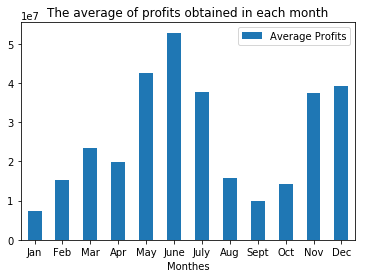

In [27]:
# This method is used to calculate the average of profits obtained in each month
def get_avg_profit_data_for_months(filename):
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        p_data = []
        #initialize months counters
        jan_no_of_released_movies = 0;
        feb_no_of_released_movies = 0;
        mar_no_of_released_movies = 0;
        apr_no_of_released_movies = 0;
        may_no_of_released_movies = 0;
        june_no_of_released_movies = 0;
        july_no_of_released_movies = 0;
        aug_no_of_released_movies = 0;
        sept_no_of_released_movies = 0;
        oct_no_of_released_movies = 0;
        nov_no_of_released_movies = 0;
        dec_no_of_released_movies = 0;
        
         #initialize months' revenues counters
        jan_profit = 0;
        feb_profit = 0;
        mar_profit = 0;
        apr_profit = 0;
        may_profit = 0;
        june_profit = 0;
        july_profit = 0;
        aug_profit = 0;
        sept_profit = 0;
        oct_profit = 0;
        nov_profit = 0;
        dec_profit = 0;
        
        for row in reader:
            month = round(float(date_of_release(row['release_date'])[0]))
            revenue = float(row['revenue'])
            budget = float(row['budget'])
            profit = revenue - budget
            
            if month == 1: 
                jan_no_of_released_movies += 1
                jan_profit += profit
            
            elif month == 2: 
                feb_no_of_released_movies += 1
                feb_profit += profit
                
            elif month == 3: 
                mar_no_of_released_movies += 1
                mar_profit += profit
                
            elif month == 4: 
                apr_no_of_released_movies += 1
                apr_profit += profit
         
            elif month == 5: 
                may_no_of_released_movies += 1
                may_profit += profit
                
            elif month == 6: 
                june_no_of_released_movies += 1
                june_profit += profit
                
            elif month == 7: 
                july_no_of_released_movies += 1
                july_profit += profit
                
            elif month == 8: 
                aug_no_of_released_movies += 1
                aug_profit += profit
                
            elif month == 9: 
                sept_no_of_released_movies += 1
                sept_profit += profit
                
            elif month == 10: 
                oct_no_of_released_movies += 1
                oct_profit += profit
                
            elif month == 11: 
                nov_no_of_released_movies += 1
                nov_profit += profit
                
            else: 
                dec_no_of_released_movies += 1
                dec_profit += profit
                
        
        jan_profit_avg = round(jan_profit/jan_no_of_released_movies)
        feb_profit_avg = round(feb_profit/feb_no_of_released_movies)
        mar_profit_avg = round(mar_profit/mar_no_of_released_movies)
        apr_profit_avg = round(apr_profit/apr_no_of_released_movies)
        may_profit_avg = round(may_profit/may_no_of_released_movies)
        june_profit_avg = round(june_profit/june_no_of_released_movies)
        july_profit_avg = round(july_profit/july_no_of_released_movies)
        aug_profit_avg = round(aug_profit/aug_no_of_released_movies)
        sept_profit_avg = round(sept_profit/sept_no_of_released_movies)
        oct_profit_avg = round(oct_profit/oct_no_of_released_movies)
        nov_profit_avg = round(nov_profit/nov_no_of_released_movies)
        dec_profit_avg = round(dec_profit/dec_no_of_released_movies)
        
        p_data.append(jan_profit_avg)
        p_data.append(feb_profit_avg)
        p_data.append(mar_profit_avg)
        p_data.append(apr_profit_avg)
        p_data.append(may_profit_avg)
        p_data.append(june_profit_avg)
        p_data.append(july_profit_avg)
        p_data.append(aug_profit_avg)
        p_data.append(sept_profit_avg)
        p_data.append(oct_profit_avg)
        p_data.append(nov_profit_avg)
        p_data.append(dec_profit_avg)
        
        print("Jan's total number of movies' releases: {}, total number of profit: {} and average profit: {}".format(jan_no_of_released_movies, jan_profit, jan_profit_avg))
        print("Feb's total number of movies' releases: {}, total number of profit: {} and average profit: {}".format(feb_no_of_released_movies, feb_profit, feb_profit_avg))
        print("Mar's total number of movies' releases: {}, total number of profit: {} and average profit: {}".format(mar_no_of_released_movies, mar_profit, mar_profit_avg))
        print("Apr's total number of movies' releases: {}, total number of profit: {} and average profit: {}".format(apr_no_of_released_movies, apr_profit, apr_profit_avg))
        print("May's total number of movies' releases: {}, total number of profit: {} and average profit: {}".format(may_no_of_released_movies, may_profit, may_profit_avg))
        print("June's total number of movies' releases: {}, total number of profit: {} and average profit: {}".format(june_no_of_released_movies, june_profit, june_profit_avg))
        print("July's total number of movies' releases: {}, total number of profit: {} and average profit: {}".format(july_no_of_released_movies, july_profit, july_profit_avg))
        print("Aug's total number of movies' releases: {}, total number of profit: {} and average profit: {}".format(aug_no_of_released_movies, aug_profit, aug_profit_avg))
        print("Sept's total number of movies' releases: {}, total number of profit: {} and average profit: {}".format(sept_no_of_released_movies, sept_profit, sept_profit_avg))
        print("Oct's total number of movies' releases: {}, total number of profit: {} and average profit: {}".format(oct_no_of_released_movies, oct_profit, oct_profit_avg))
        print("Nov's total number of movies' releases: {}, total number of profit: {} and average profit: {}".format(nov_no_of_released_movies, nov_profit, nov_profit_avg))
        print("Dec's total number of movies' releases: {}, total number of profit: {} and average profit: {}".format(dec_no_of_released_movies, dec_profit, dec_profit_avg))
        
        return (p_data)

p_data = get_avg_profit_data_for_months(data_file)
profit = []
for avg in p_data:
    profit.append(avg)

bars = ('Jan', 'Feb', 'Mar', 'Apr', 'May','June' ,'July' ,'Aug' ,'Sept', 'Oct' ,'Nov' , 'Dec' )       
df = pd.DataFrame({'Monthes': bars, 'Average Profits': profit})
ax = df.plot.bar(x='Monthes', y='Average Profits', rot=0, title='The average of profits obtained in each month')

As we can see from the graph above, the movies that was released in June achieved the highest profits. Then these were released in May, July, November and December. 

<a id='conclusions'></a>
## Conclusions

In this project, I used TMDb movie data to address the following questions: 
1- What kinds of properties are associated with movies that have high revenues?
2- Are movies' profits affected by the month of release ?

For the first question, I found there is a direct relationship between the movie's budget and users' votes, and the obtained revenues.  

Regarding the second question, movies that were released in the summer achieved the highest profits. Furthermore, the movies that were released in Nov. and Dec. obtained high profits also. I think because of these 2 months have some public holidays such as Thanksgiving and Christmas which be spent usually with family and friends. The least profitable time was in Jan. where winter storms are increased and people prefere to stay home. Sept. also isn't a profitable time to release when the school is back. 

When it comes to the limitations of this dataset, there is a lot of missing values that could affect our predicted results negatively. As we can see the budget and revenue features which considered important features have a lot of zero values. So after reprocess them we lost more than the half of our dataset. This may leads to wrong analysis thus incorrect results. 



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0